1. Implement a linear regression model: Linear regression is a simple and widely-used machine learning algorithm for predicting a continuous outcome. You could try implementing a linear regression model from scratch using a library such as NumPy, and then apply it to a dataset to see how well it performs.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
data = pd.read_csv('csv/insurance.csv')

 View charges in relation with the:
 * age
 * sex 
 * children 
 * other parameters

In [14]:
X = data['age']

In [63]:
data.shape

(1338, 8)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [65]:
data.keys()

Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

Age -> Insurance

View the difference between the [20-30] - [50-60]

In [66]:
condition_age_1 = data['age']>=20
condition_age_2 = data['age']<=30
condition_age = data[condition_age_1 & condition_age_2]
condition_age

,index,age,sex,bmi,children,smoker,region,charges
2,2,28,male,33.000,3,no,southeast,4449.46200
10,10,25,male,26.220,0,no,northeast,2721.32080
12,12,23,male,34.400,0,no,southwest,1826.84300
14,14,27,male,42.130,0,yes,southeast,39611.75770
17,17,23,male,23.845,0,no,northeast,2395.17155
...,...,...,...,...,...,...,...,...
1308,1308,25,female,30.200,0,yes,southwest,33900.65300
1314,1314,30,female,23.655,3,yes,northwest,18765.87545
1328,1328,23,female,24.225,2,no,northeast,22395.74424
1331,1331,23,female,33.400,0,no,southwest,10795.93733


In [67]:
condition_age_3 = data['age']>=50
condition_age_4 = data['age']<=60
age_condition = data[condition_age_3 & condition_age_4]
age_condition

,index,age,sex,bmi,children,smoker,region,charges
9,9,60,female,25.840,0,no,northwest,28923.13692
13,13,56,female,39.820,0,no,southeast,11090.71780
16,16,52,female,30.780,1,no,northeast,10797.33620
18,18,56,male,40.300,0,no,southwest,10602.38500
20,20,60,female,36.005,0,no,northeast,13228.84695
...,...,...,...,...,...,...,...,...
1327,1327,51,male,30.030,1,no,southeast,9377.90470
1329,1329,52,male,38.600,2,no,southwest,10325.20600
1330,1330,57,female,25.740,2,no,southeast,12629.16560
1332,1332,52,female,44.700,3,no,southwest,11411.68500


In [74]:
new_col = data[['age', 'charges']]
new_col[new_col['age']<25]

,age,charges
0,19,16884.92400
1,18,1725.55230
12,23,1826.84300
15,19,1837.23700
17,23,2395.17155
...,...,...
1328,23,22395.74424
1331,23,10795.93733
1334,18,2205.98080
1335,18,1629.83350


In [86]:
new_age = condition_age.combine_first(age_condition)
#age_condition
#condition_age.
new_age

,index,age,sex,bmi,children,smoker,region,charges
2,2,28,male,33.00,3,no,southeast,4449.46200
9,9,60,female,25.84,0,no,northwest,28923.13692
10,10,25,male,26.22,0,no,northeast,2721.32080
12,12,23,male,34.40,0,no,southwest,1826.84300
13,13,56,female,39.82,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...,...
1330,1330,57,female,25.74,2,no,southeast,12629.16560
1331,1331,23,female,33.40,0,no,southwest,10795.93733
1332,1332,52,female,44.70,3,no,southwest,11411.68500
1333,1333,50,male,30.97,3,no,northwest,10600.54830


In [88]:
X_age = new_age['age']
y_age = new_age['charges']

<BarContainer object of 601 artists>

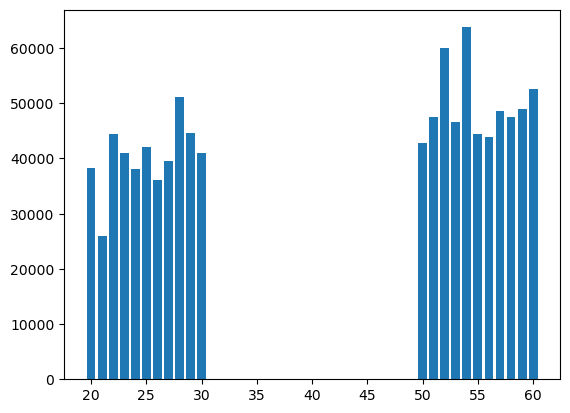

In [90]:
plt.bar(X_age,y_age)

Sex -> Charges

In [136]:
male = data[data['sex'] == 'male']
female = data[data['sex'] == 'female']

In [138]:
male.head()

,index,age,sex,bmi,children,smoker,region,charges
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
8,8,37,male,29.830,2,no,northeast,6406.41070


In [139]:
female.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.92400
5,5,31,female,25.74,0,no,southeast,3756.62160
6,6,46,female,33.44,1,no,southeast,8240.58960
7,7,37,female,27.74,3,no,northwest,7281.50560
9,9,60,female,25.84,0,no,northwest,28923.13692


<BarContainer object of 2 artists>

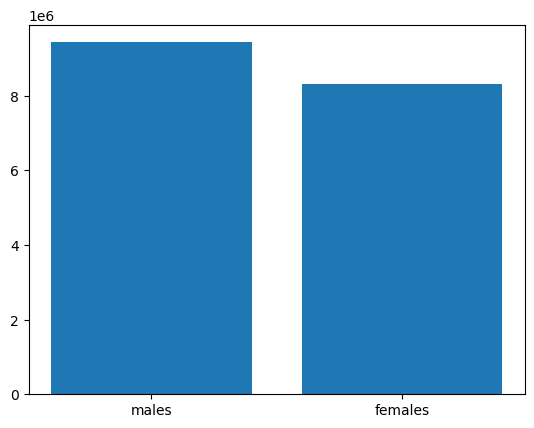

In [141]:
x_condition_2 = np.array(["males","females"])
sum_males = sum(male.iloc[:,7].values)
x_sex_condition_2 = pd.Series(np.array([sum(male.iloc[:,7].values),sum(female.iloc[:,7].values)]))
plt.bar(x_condition_2, x_sex_condition_2) 

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [146]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


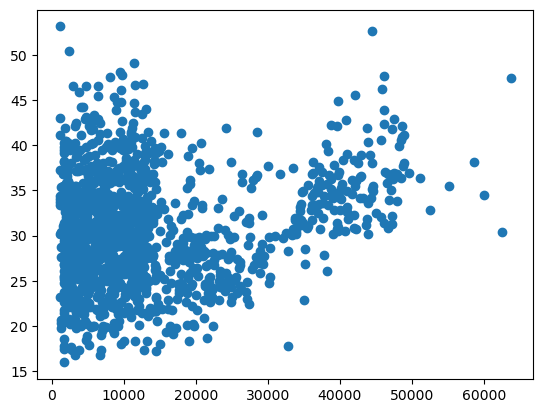

In [145]:
plt.scatter(data['charges'],data['bmi'])

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [148]:
data['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

<BarContainer object of 1338 artists>

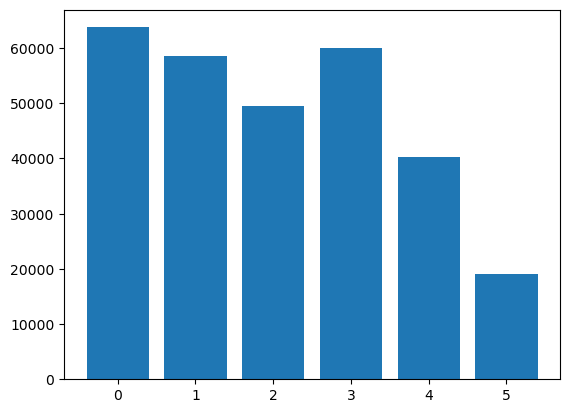

In [149]:
plt.bar(data['children'].values, data['charges'])

In [150]:
x_children = data['children']
y_children = data['charges']

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x_children, y_children, test_size=0.3)

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
model = LinearRegression()

In [158]:
model.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [161]:
y_predict = model.predict(x_test.values.reshape(-1,1))

<BarContainer object of 402 artists>

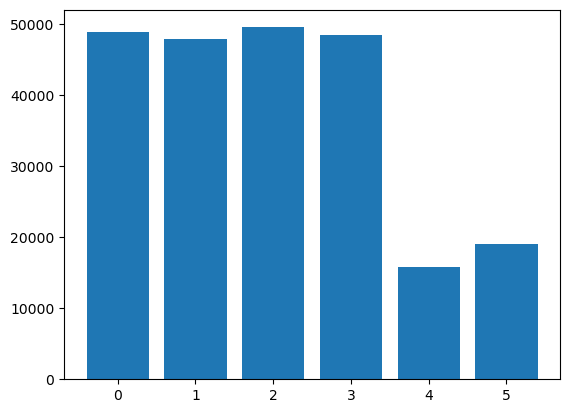

In [167]:
plt.bar(x_test,y_test)

In [171]:
model.score(x_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

0.00034944118316682093